# 2. Load Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = "C:\DL\FastCampus\DataAnalysis\CSV\data_2021.csv"
data = pd.read_csv(file)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154110 entries, 0 to 154109
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   집계일자     154110 non-null  int64
 1   집계시      154110 non-null  int64
 2   출발영업소코드  154110 non-null  int64
 3   도착영업소코드  154110 non-null  int64
 4   통행시간     154110 non-null  int64
 5   요일       154110 non-null  int64
dtypes: int64(6)
memory usage: 7.1 MB


# 3. 집계시

In [3]:
data_06_22 = data[data.집계시.isin(range(6,23))]
data_06_22.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115832 entries, 0 to 154109
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   집계일자     115832 non-null  int64
 1   집계시      115832 non-null  int64
 2   출발영업소코드  115832 non-null  int64
 3   도착영업소코드  115832 non-null  int64
 4   통행시간     115832 non-null  int64
 5   요일       115832 non-null  int64
dtypes: int64(6)
memory usage: 6.2 MB


In [4]:
data_06_22.sort_values(by="집계시")

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일
84170,20210721,6,101,140,15381,2
38628,20210406,6,101,105,720,1
56035,20210512,6,101,105,804,2
56036,20210512,6,101,105,688,2
38627,20210406,6,101,105,892,1
...,...,...,...,...,...,...
96627,20210819,22,101,120,8836,3
148322,20211218,22,101,115,5955,5
148321,20211218,22,101,115,4662,5
11015,20210128,22,101,115,5424,3


In [5]:
data_06_22_count = data_06_22["집계시"].value_counts()

In [6]:
data_06_22_count

9     7116
10    7113
11    7101
12    7098
13    7089
14    7087
15    7012
16    6987
8     6978
17    6903
18    6776
7     6763
19    6659
20    6509
6     6392
21    6255
22    5994
Name: 집계시, dtype: int64

In [8]:
data_06_22_count_sort = data_06_22_count.sort_index()
print(data_06_22_count_sort)

6     6392
7     6763
8     6978
9     7116
10    7113
11    7101
12    7098
13    7089
14    7087
15    7012
16    6987
17    6903
18    6776
19    6659
20    6509
21    6255
22    5994
Name: 집계시, dtype: int64


In [10]:
#storage index of data_06_22_count into x
x = data_06_22_count_sort.index
print(x)

Int64Index([6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22], dtype='int64')


In [14]:
lables = [str(i) + "시" for i in x]
print(lables)

['6시', '7시', '8시', '9시', '10시', '11시', '12시', '13시', '14시', '15시', '16시', '17시', '18시', '19시', '20시', '21시', '22시']


In [11]:
#storage value of data_06_22_count into x
y = data_06_22_count_sort.values
print(y)

[6392 6763 6978 7116 7113 7101 7098 7089 7087 7012 6987 6903 6776 6659
 6509 6255 5994]


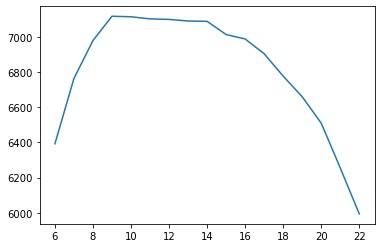

In [12]:
plt.plot(x, y)

C:\Users\Jin\anaconda3\envs\DL\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


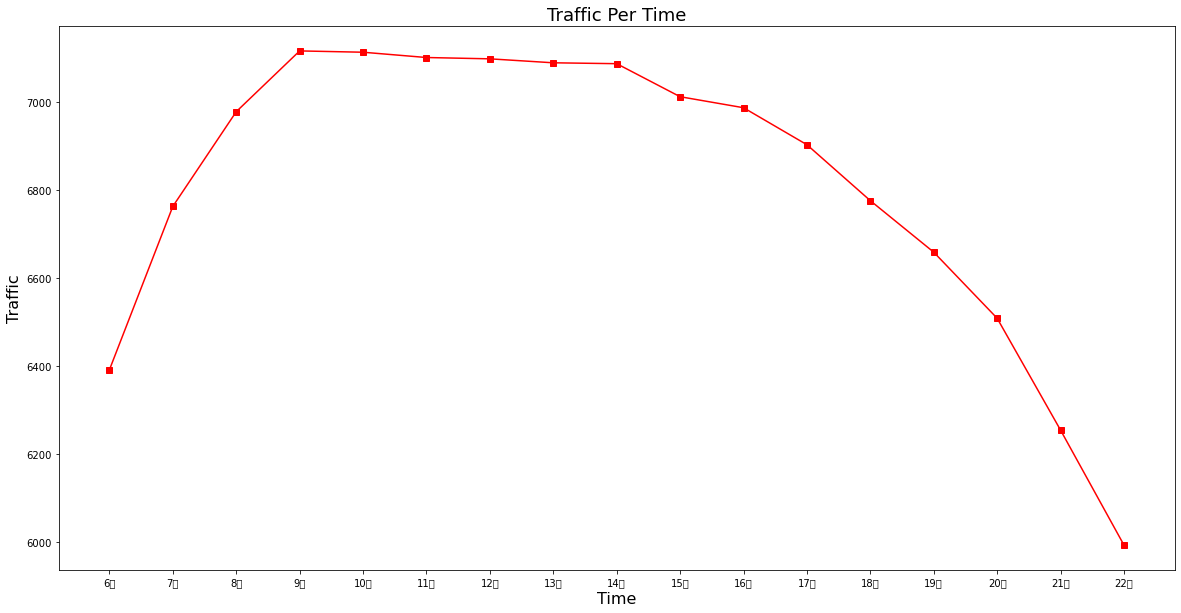

In [16]:
# Config size
plt.figure(figsize=(20,10))
plt.plot(lables, y, marker="s", color="r")
plt.title("Traffic Per Time", fontsize=18)
plt.xlabel("Time", fontdict={"size":16})
plt.ylabel("Traffic", fontdict={"size":16})
plt.show()

# 4. 도착영업소코드

In [18]:
data_destination_count = data['도착영업소코드'].value_counts()

In [20]:
data_destination_count_sort = data_destination_count.sort_index()
print(data_destination_count_sort)

105    49653
110    37823
115    27574
120     7193
125     7723
130     7867
135     7612
140     8665
Name: 도착영업소코드, dtype: int64


In [23]:
# Store index of data_06_22_count into x
x = data_destination_count_sort.index
print(x)

Int64Index([105, 110, 115, 120, 125, 130, 135, 140], dtype='int64')


In [24]:
lables = [str(i) for i in x]
print(lables)

['105', '110', '115', '120', '125', '130', '135', '140']


In [25]:
# Store value of data_06_22_count into y
values = data_destination_count_sort.values
print(values)

[49653 37823 27574  7193  7723  7867  7612  8665]


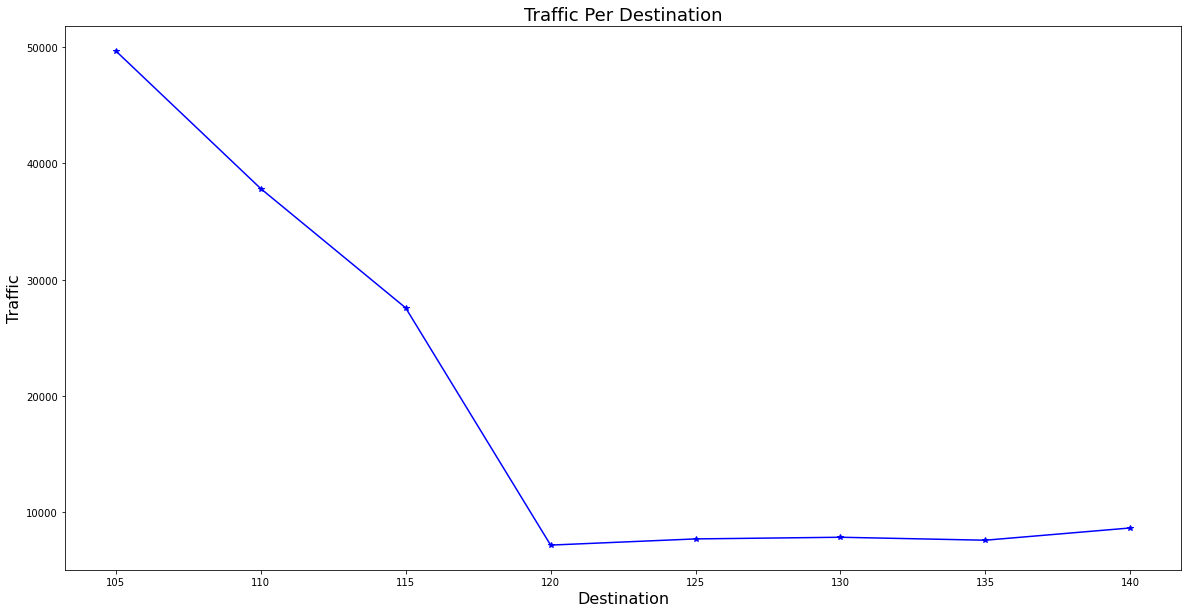

In [27]:
# Config size
plt.figure(figsize=(20,10))
plt.plot(lables, values, marker="*", color="b")
plt.title("Traffic Per Destination", fontsize=18)
plt.xlabel("Destination", fontdict={"size":16})
plt.ylabel("Traffic", fontdict={"size":16})
plt.show()

# 5. 요일

In [28]:
data_weekdays = data.groupby(by=["요일"]).mean()

In [29]:
data_weekdays

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간
요일,,,,,
0,2.021067e+07,11.634853,101.0,114.462980,5158.098941
1,2.021067e+07,11.723669,101.0,114.074944,5101.178747
2,2.021068e+07,11.755493,101.0,114.058710,5048.448651
3,2.021068e+07,11.734553,101.0,114.074535,5108.408786
4,2.021068e+07,11.861265,101.0,114.469859,5408.943224
5,2.021066e+07,11.142020,101.0,115.024414,5768.411412
6,2.021067e+07,12.297062,101.0,115.049390,5165.774502


In [30]:
data_weekdays_time = data_weekdays["통행시간"]

In [31]:
data_weekdays_time

요일
0    5158.098941
1    5101.178747
2    5048.448651
3    5108.408786
4    5408.943224
5    5768.411412
6    5165.774502
Name: 통행시간, dtype: float64

In [33]:
x = data_weekdays_time.index
lables = [str(i) for i in x]
print(lables)

['0', '1', '2', '3', '4', '5', '6']


In [34]:
values = data_weekdays_time.values
print(values)

[5158.09894103 5101.1787472  5048.44865083 5108.40878603 5408.9432236
 5768.41141183 5165.77450224]


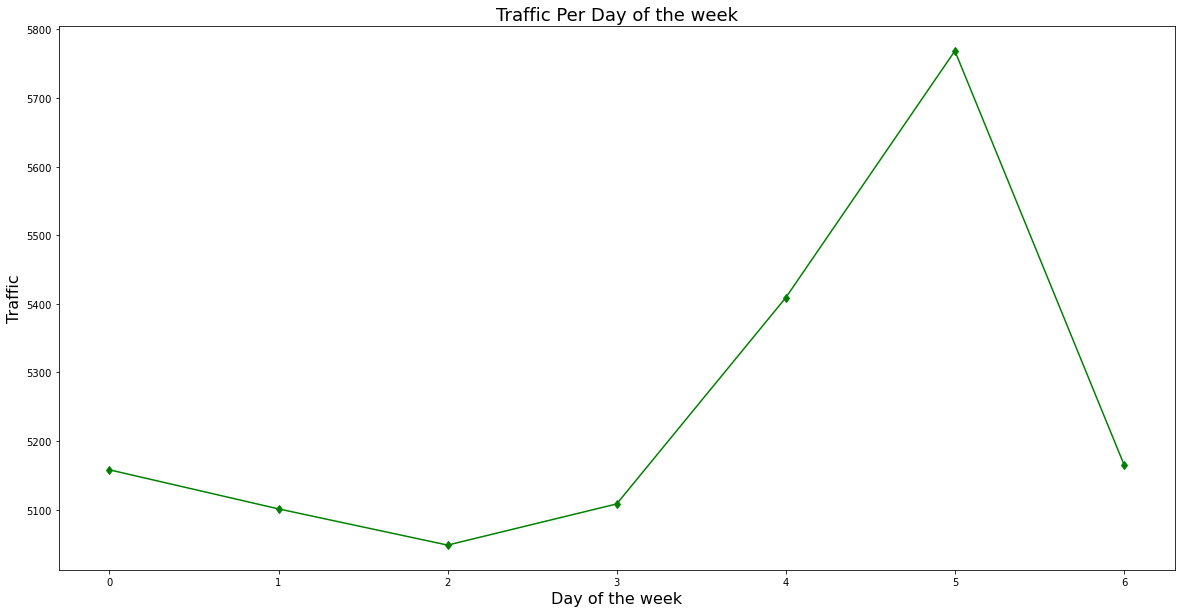

In [36]:
# Config size
plt.figure(figsize=(20,10))
plt.plot(lables, values, marker="d", color="g")
plt.title("Traffic Per Day of the week", fontsize=18)
plt.xlabel("Day of the week", fontdict={"size":16})
plt.ylabel("Traffic", fontdict={"size":16})
plt.show()